In [1]:
import sys
sys.path.append("..")
import numpy as np
from numpy.linalg import inv
from scipy.stats import multivariate_normal
import scipy
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

from HugHop.StandardHugHop import HugHop
from HugHop.HessianHugHop import HugHopPC
from utils import quick_MVN_scatter, quick_MVN_marginals

In [26]:
# Target Distribution
mu = np.zeros(2)
Sigma = np.array([[1.0, 0.99], [0.99, 2.0]])
target = multivariate_normal(mu, Sigma)
grad_log_pi = lambda xy: - inv(Sigma) @ xy

# Symmetric Proposal Distribution for the Velocity
scale_q = 0.5
q = multivariate_normal(np.zeros(2), (scale_q**2)*np.eye(2))

# Settings
x0 = target.rvs()     # Starting point
T = 0.1 
B = 5 
N = 1600000
l = 2.0     
k = 1.0
burnin = 50000

# Standard Hug and Hop

- N = 50k took 
    CPU times: user 53.4 s, sys: 12.1 ms, total: 53.4 s
    Wall time: 53.4 s
    
- N = 100k took
    CPU times: user 4min 59s, sys: 3.13 s, total: 5min 2s
    Wall time: 2min 13s
    
- N = 200k took
    CPU times: user 23min 5s, sys: 16.5 s, total: 23min 21s
    Wall time: 6min 44s
    
- N = 400k took
    CPU times: user 1h 20min 40s, sys: 10min 17s, total: 1h 30min 58s
    Wall time: 23min 40s

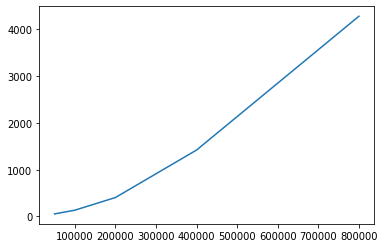

In [24]:
nsamp = np.array([50000, 100000, 200000, 400000, 800000, 1600000])
times = np.array([53.4, 2*60+13, 6*60+44, 23*60+40, 1*3600+11*60+22])
plt.plot(nsamp, times)
plt.show()

In [27]:
%%time 
samples, _, _ = HugHop(T, B, x0, q, target.logpdf, grad_log_pi, l, k).sample(N)

KeyboardInterrupt: 

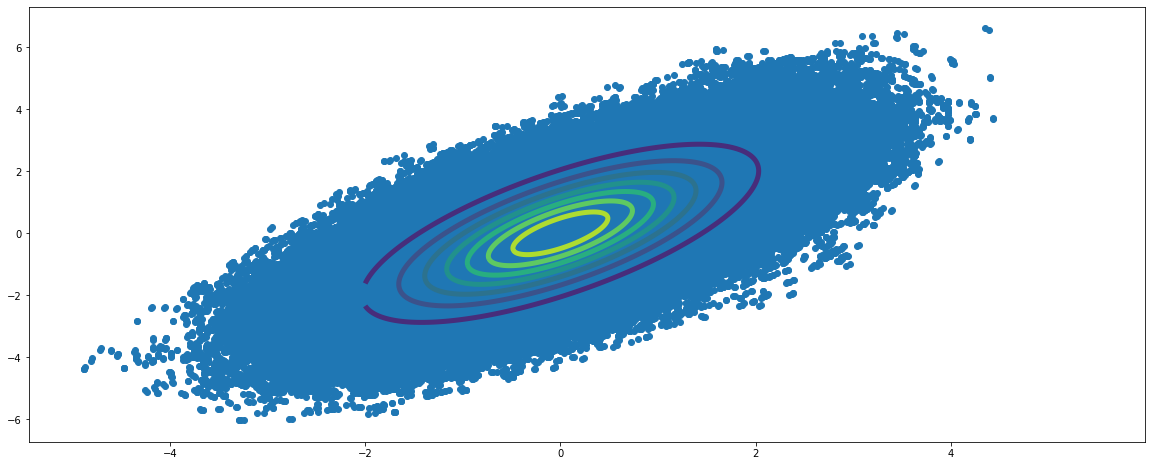

In [23]:
quick_MVN_scatter(samples, target)

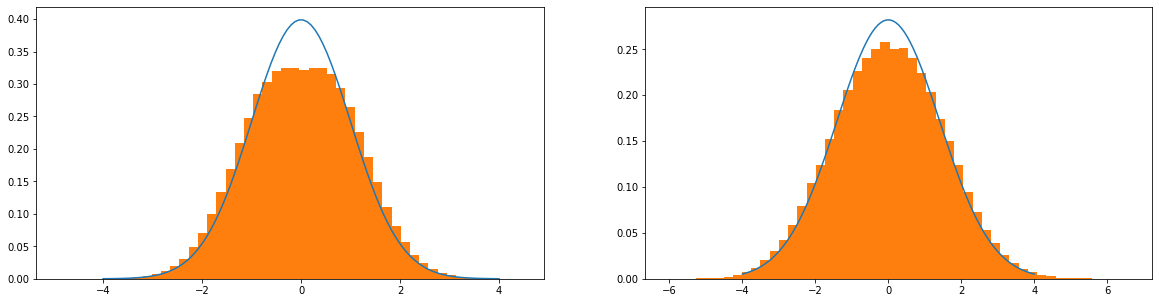

In [25]:
quick_MVN_marginals(samples, target)

# Hug and Hop with Preconditioning (Hessian)

In [6]:
samplesH, _, _ = HugHopPC(T, B, x0, q, target.logpdf, grad_log_pi, l, k, burnin).sample(N)

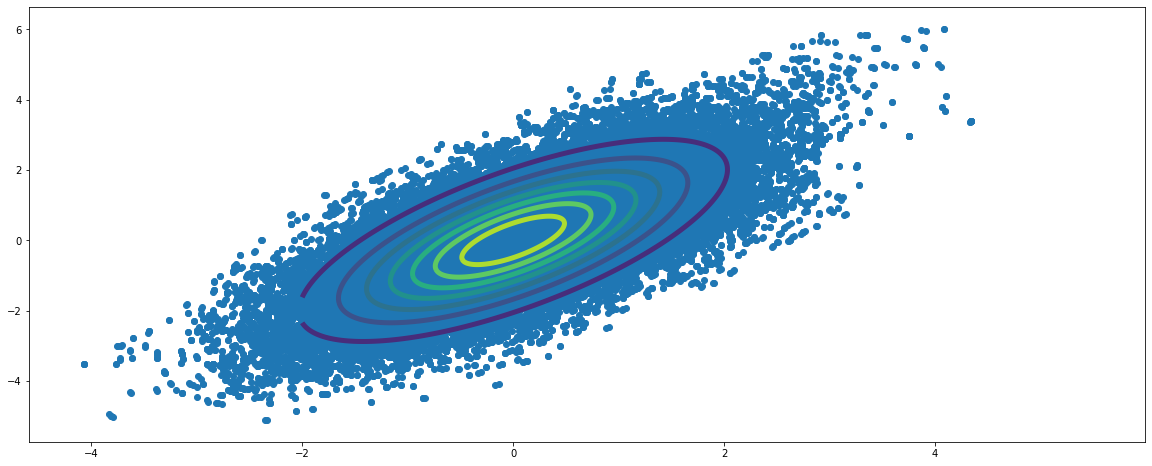

In [7]:
quick_MVN_scatter(samplesH, target)

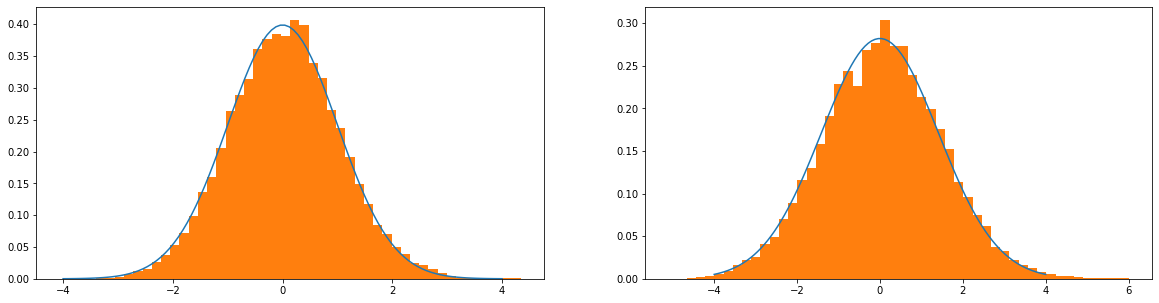

In [8]:
quick_MVN_marginals(samplesH, target)

# 2 million Hug & Hop - No Preconditioning

In [7]:
mu = np.zeros(2)
Sigma = np.array([[1.0, 0.99], [0.99, 2.0]])
target = multivariate_normal(mu, Sigma)
grad_log_pi = lambda xy: - inv(Sigma) @ xy
scale_q = 0.5
q = multivariate_normal(np.zeros(2), (scale_q**2)*np.eye(2))

In [20]:
x0 = target.rvs()     # Starting point
T = 0.1 
B = 5 
N = 2000000
l = 2.0     
k = 1.0
#burnin = 50000

In [21]:
%%time
samples, _, _ = HugHop(T, B, x0, q, target.logpdf, grad_log_pi, l, k).sample(N)

KeyboardInterrupt: 

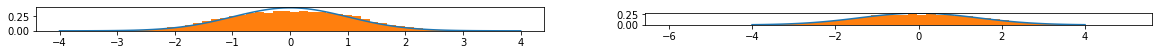

In [22]:
quick_MVN_marginals(samples, target)

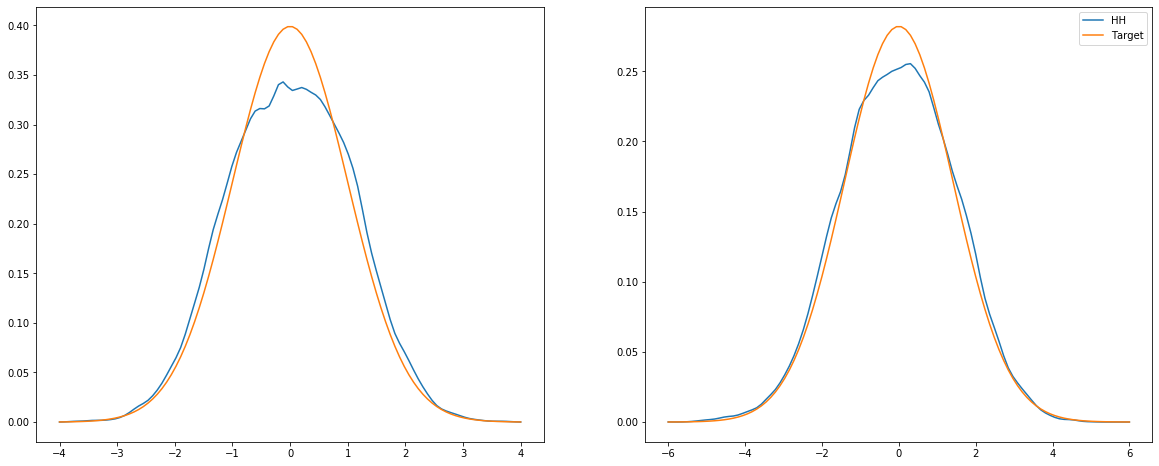

In [23]:
xdensity = gaussian_kde(samples[:, 0])
ydensity = gaussian_kde(samples[:, 1])
marginal_x = lambda x: scipy.stats.norm(loc=target.mean[0], scale=np.sqrt(target.cov[0, 0])).pdf(x)
marginal_y = lambda x: scipy.stats.norm(loc=target.mean[1], scale=np.sqrt(target.cov[1, 1])).pdf(x)

xdata = np.linspace(-4, 4,100)
ydata = np.linspace(-6, 6, 100)
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))
# X axis
ax[0].plot(xdata, xdensity(xdata), label="HH")
ax[0].plot(xdata, marginal_x(xdata), label="Target")
# Y axis
ax[1].plot(ydata, ydensity(ydata), label="HH")
ax[1].plot(ydata, marginal_y(ydata), label="Target")
plt.legend()
plt.show()